# **Case 4: Decision Trees and Random Forest - Employee Attrition**

### Note:

The code cells containing Hyperparameter Tuning using GridSearchCV ** take considerable time to run.**

-----
## **Context:**
-----

McCurr Health Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources are spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to **predict if an employee is at risk of attrition.** This information will be used to target them with incentives.

-----
## **Objective:**
-----

* To identify the different factors that drive attrition
* To make a model to predict the attrition

-----
## **Dataset:**
-----

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber -** Employee Identifier
* **Attrition -** Did the employee attrite?
* **Age -** Age of the employee
* **BusinessTravel -** Travel commitments for the job
* **DailyRate -** Data description not available**
* **Department -** Employee Department
* **DistanceFromHome -** Distance from work to home (in km)
* **Education -** 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField -** Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

**In the real world, you will not find definitions for some of your variables. It is a part of the analysis to figure out what they might mean.**

### **Importing the necessary libraries**

In [101]:
# ! pip install jupyter_contrib_nbextensions
# ! jupyter contrib nbextension install --user
# ! jupyter nbextension enable spellchecker/main

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Reading the dataset**

In [103]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1IvMdM1rD2qY0lsM9hGBepCK6xgx7SUV7/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)

In [104]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### **Printing the info**

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observation:**
- There are 2940 observations and 33 columns.
- All the column have 2940 non-null values i.e. **there are no missing values in the data.**

**Let's check the unique values in each column**

In [106]:
#checking unique values in each column
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observation:**
- **Employee number is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- **Over18 and StandardHours have only 1 unique value.** These columns will not add any value to our model hence we can drop them.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [107]:
#dropping the columns
df=df.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [108]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 2940 non-null   object
 1   Age                       2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

In [110]:
#Creating numerical columns
num_cols=['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
          'YearsAtCompany','NumCompaniesWorked','HourlyRate',
          'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

#Creating categorical variables
cat_cols= ['Attrition','OverTime','BusinessTravel', 'Department','Education', 'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
           'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

### **Exploratory Data Analysis and Data Preprocessing**

**Note:** We have explored this data earlier in the case study for classification. Here, we will simply look at some basic univariate analysis and data preprocessing and move to the model building section.

### **Univariate analysis of numerical columns**

In [111]:
#Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 km radius** from the organization. However there are some extreme values, seeing as the maximum value is 29 km.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **Average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike 14% or less, with the maximum salary hike being 25%.
- Average number of years an employee is associated with the company is 7.
- **On average, the number of years since an employee got a promotion is 2.18**. The majority of employees have been promoted since the last year.

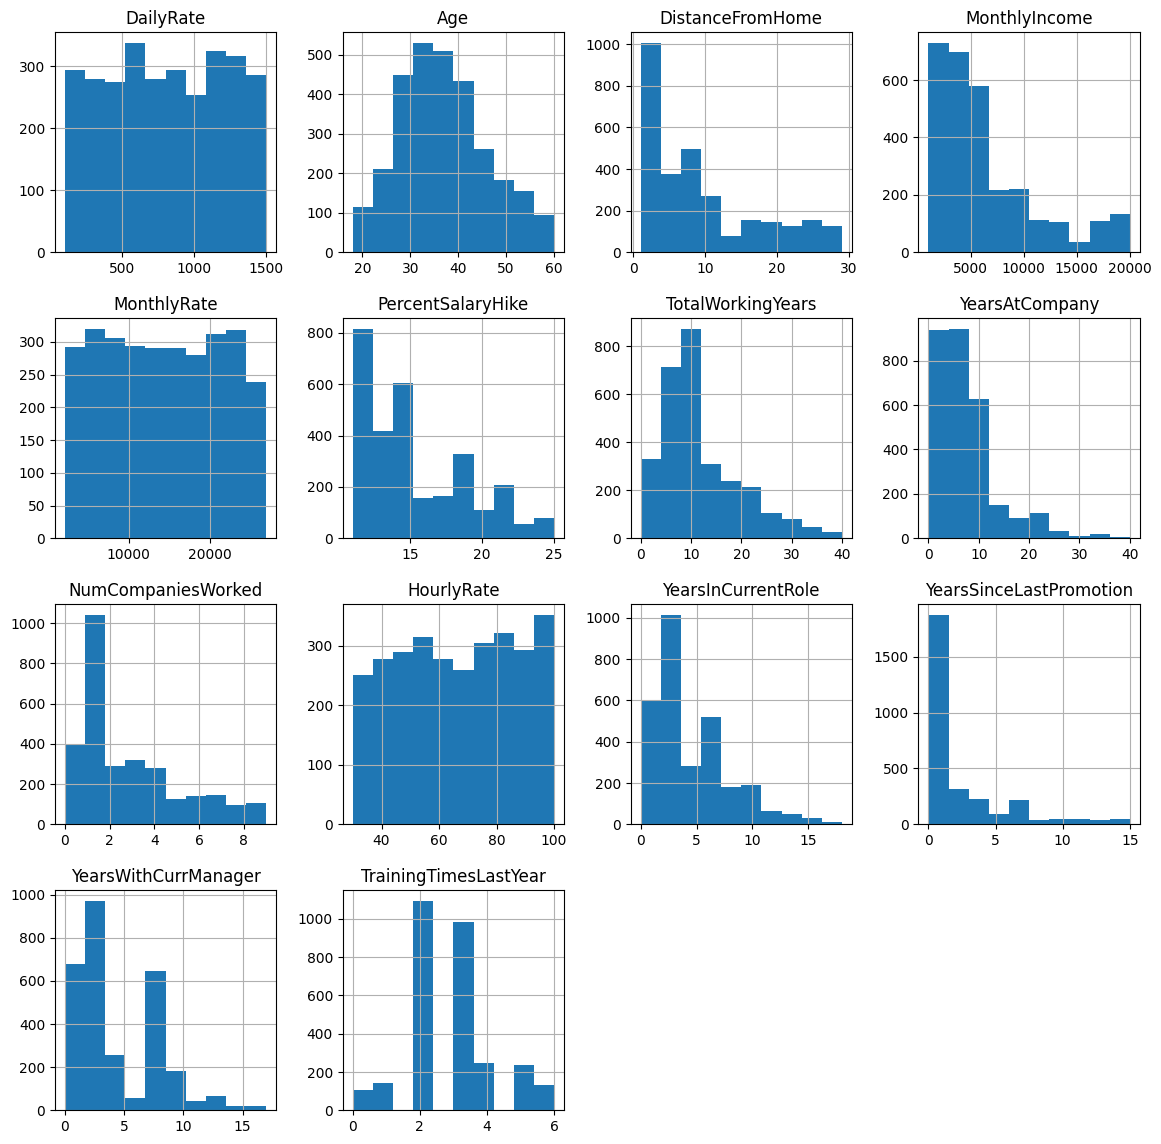

In [112]:
#creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- **The age distribution is close to a normal distribution** with the majority of employees between the ages of 25 and 50.

- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increases.

- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.

- **DistanceFromHome also has a right skewed distribution**, meaning most employees live close to work but there are a few that live further away.

- **On average, an employee has worked at 2.5 companies.** Most employees have worked at only 1 company.

- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization.

- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.

- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees and the like.

- The distributions of DailyRate, HourlyRate and MonthlyRate appear to be uniform and do not provide much information. It could be that daily rate refers to the income earned per extra day worked while hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similiar for multiple employees in the same department, that explains the uniform distribution they show.

### **Univariate analysis for categorical variables**

In [113]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
****************************************
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
****************************************
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
****************************************
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
****************************************
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
****************************************
4    0.312245
3    0.300680
1    0.196599
2    0.

**Observations:**

- **The employee attrition rate is 16%.**
- **Around 28% of the employees are working overtime.** This number appears to be on the higher side, and might indicate a stressed employee work-life.
- 71% of the employees have traveled rarely, while around 19% have to travel frequently.
- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields.
- Over 65% of employees work in the Research & Development department of the organization.
- **Nearly 40% of the employees have low (1) or medium-low (2) job satisfaction** and environment satisfaction in the organization, indicating that the morale of the company appears to be somewhat low.
- **Over 30% of the employees show low (1) to medium-low (2) job involvement.**
- Over 80% of the employees either have none or very few stock options.
- **In terms of performance ratings, none of the employees have rated lower than 3 (excellent).** About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or  the more likely scenerio is that the organization could be highly lenient with its performance appraisal process.

**Now that we have explored our data, let's build the model.**

### **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

### **Data preparation**

**Creating dummy variables for the categorical variables**

In [114]:
#creating list og dummy columns
to_get_dummies_for = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus','JobRole']

#creating dummy variables
df = pd.get_dummies(data = df, columns= to_get_dummies_for, drop_first= True)

#mapping ovetime and attrition
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}


df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

### **Separating the independent (X) and dependent variables (Y)**

In [115]:
#Separating target variable and other variables
Y= df.Attrition
X= df.drop(['Attrition'],axis=1)

### **Splitting the data into 70% train and 30% test set**

In [116]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

### **Model evaluation criterion**

#### The model can make two types of wrong predictions:
1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite and the employee actually attrites

#### Which case is more important?
* **Predicting that the employee will not attrite but the employee attrites** i.e. losing out on a valuable employee or asset. This would be considered a major miss for any employee attrition predictor, and is hence the more important case of wrong predictions.

#### How to reduce this loss i.e. the need to reduce False Negatives?
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall (minimizing the false negatives) or in other words identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control attrition rate especially for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [117]:
#creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attriate', 'Attriate'], yticklabels=['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Building the model**

We will be building 2 different models:
- **Decision Tree**
- **Random Forest**


### **Building a Decision Tree Model**

* We will build our model using the **DecisionTreeClassifier function.**
* If the frequency of class A is 17% and the frequency of class B is 83%, then class B will become the dominant class and **the decision tree will become biased toward the dominant classes.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [118]:
#building decision tree
dt = DecisionTreeClassifier(class_weight={0:0.83,1:0.17}, random_state=1)

In [119]:
#fitting decision tree
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.83, 1: 0.17}, random_state=1)

### **Problem 1: Checking the model performance of the decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



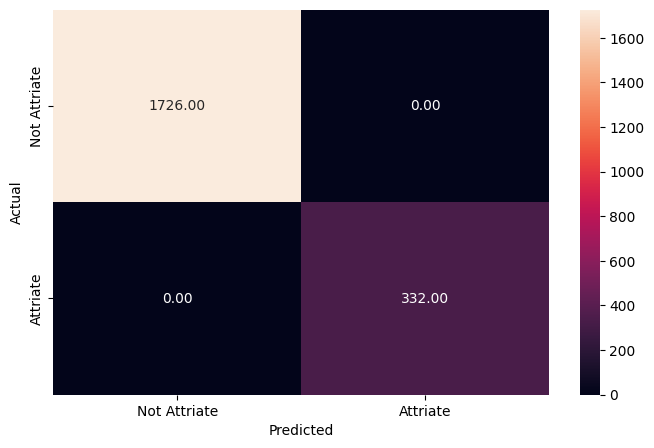

In [120]:
#checking performance on train dataset
y_train_pred_dt=dt.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

### **1.a. State your observations based on the output showing the performance of the decision tree on the TRAINING set:**
- **For class 0, both precision and recall are 100%. This means that the model correctly identifies all instances of class 0  and does not incorrectly label any instances from other classes as class 0.**
- **Similarly, for class 1, both precision and recall are 100%. This indicates that the model correctly identifies all instances of class 1  and does not incorrectly label any instances from other classes as class 1.**

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       740
           1       0.79      0.87      0.83       142

    accuracy                           0.94       882
   macro avg       0.89      0.91      0.90       882
weighted avg       0.95      0.94      0.94       882



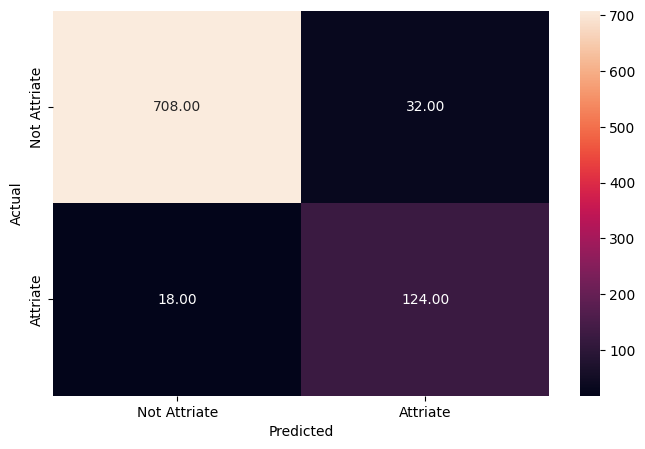

In [121]:
#checking performance on test dataset
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

### **1.b. State your observations based on the output showing the performance of the decision tree on the TEST set:**

- **there's a notable difference in performance between the two classes, with class 1 having lower precision and recall compared to class 0. This suggests that the model might struggle more with correctly identifying instances of class 1.**
- **In conclusion, although there is a drop in performance when transitioning from the training to the testing set, the testing set's performance is not significantly worse. The model appears to generalize reasonably well, but there may be some overfitting on the training data, as evidenced by the perfect performance on the training set.**


**Let's plot the feature importance and check the most important features:**

<Axes: xlabel='Importance', ylabel='None'>

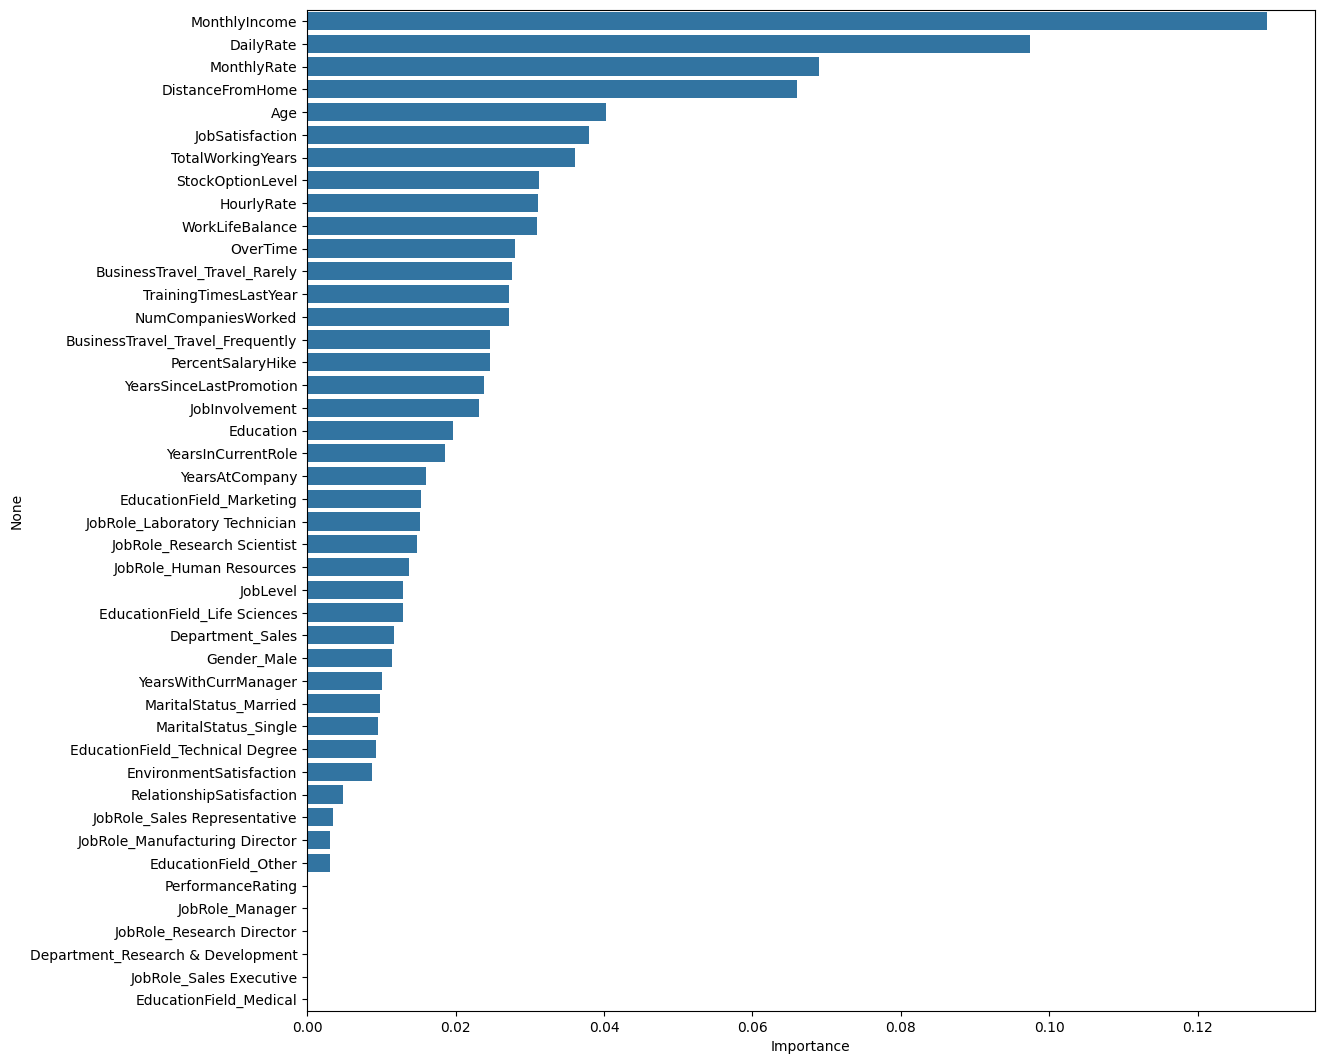

In [122]:
#plotting the importance plot
importances = dt.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

**Observations:**
- According to the Decision Tree, **Overtime is the most important feature, followed by Age, total working years and Monthly income.**
- This might signify that people who are at risk of attrition have low income, are doing overtime and have less experience.
- The other important features are dailyrate, distance from home, job involvement and percentage salary hike.

**Let's try to tune the model and check if we could improve the results.**

### **Tuning Models**

### **Using GridSearch for Hyperparameter Tuning on the model**

* Hyperparameter tuning is also tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion{“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [123]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.83,0:0.17}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)
gridCV = gridCV.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17}, criterion='entropy', max_depth=6,
                       min_samples_leaf=25, random_state=1)

### **Problem 2: Model Performance of the tuned decision tree**

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1726
           1       0.49      0.69      0.57       332

    accuracy                           0.84      2058
   macro avg       0.71      0.78      0.74      2058
weighted avg       0.86      0.84      0.85      2058



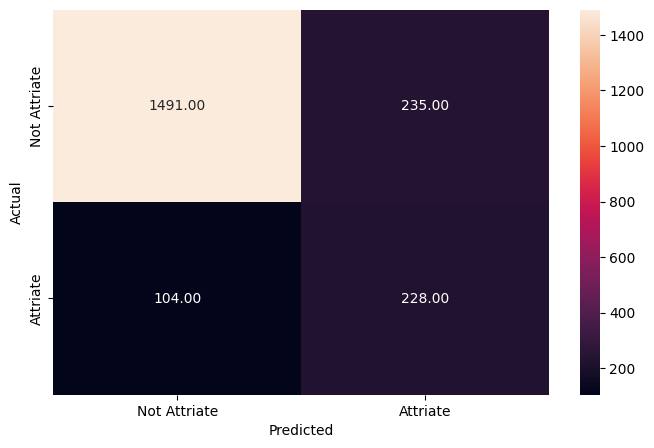

In [124]:
y_train_pred_dt=dtree_estimator.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

### **2.a. State your observations based on the output showing the performance of the tuned classification tree on the TRAINING set**
- **While it achieves relatively high accuracy and good performance metrics for class 0, its performance for class 1 is notably lower, with lower precision, recall, and F1-score.**
- **This suggests that the model may struggle more with correctly identifying instances of class 1, indicating potential areas for improvement. Further model adjustments may be necessary to enhance performance, particularly for minority class predictions.**

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       740
           1       0.45      0.58      0.51       142

    accuracy                           0.82       882
   macro avg       0.68      0.72      0.70       882
weighted avg       0.84      0.82      0.83       882



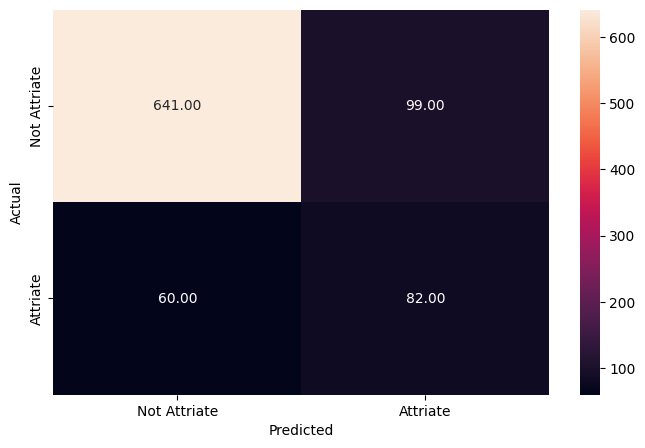

In [125]:
y_test_pred_dt=dtree_estimator.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

### **2.b. State your observations based on the output showing the performance of the tuned classification tree on the TEST set****
- **while the tuning process might have improved some aspects of the model's performance, such as precision for class 0, it appears to have negatively affected the overall accuracy and performance for class 1 predictions.**
- ** While it achieves relatively high accuracy and good performance metrics for class 0, its performance for class 1 is notably lower, with lower precision, recall, and F1-score. T**



**Let's look at the feature impotance of this model and try to analyze why this is happening.**

<Axes: xlabel='Importance', ylabel='None'>

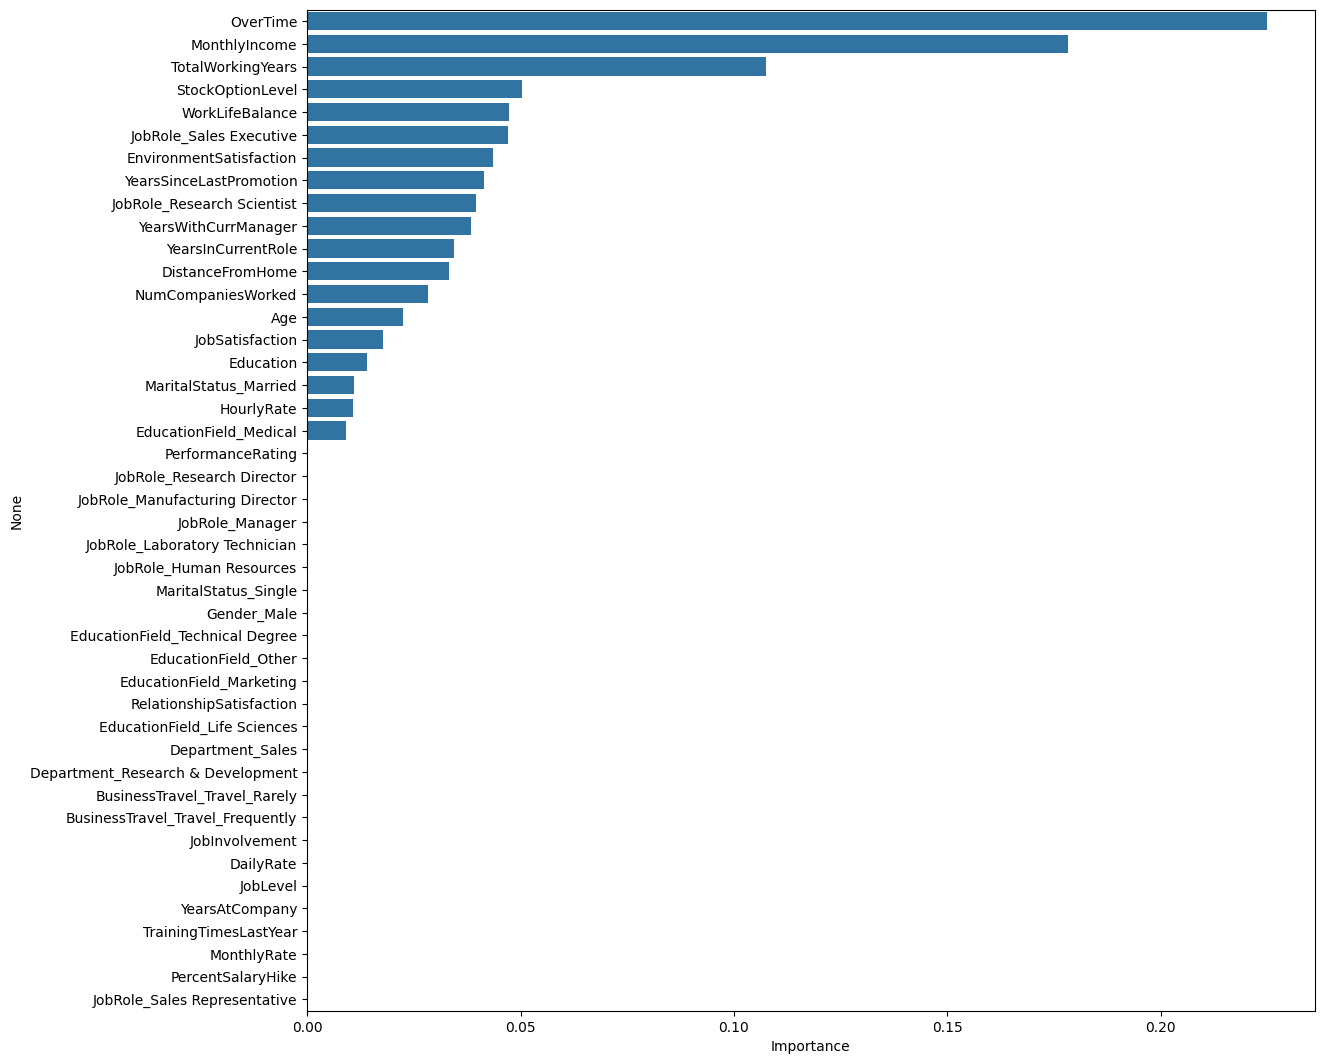

In [126]:
importances = dtree_estimator.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

### **2.c. Describe the differences you observe between the features identified as important for the tuned model vs. the base model from part 1**
- **The extremity of the importance of features increased, the scale of importance for the important ones increased up to .2, but a lot of the features became of 0 importance.**
- **Overtime, the less important feature of the base moedel became very important in the tuned model**



**Let's plot the tree and check if the assumptions about overtime income are true**

As we know, the decision tree keeps growing until the nodes are homogeneous i.e. it has only one class and the dataset here has a lot of features.

It would be hard to visualize the whole tree with so many features. Therefore we are only visualizing the tree up to max_depth=4.

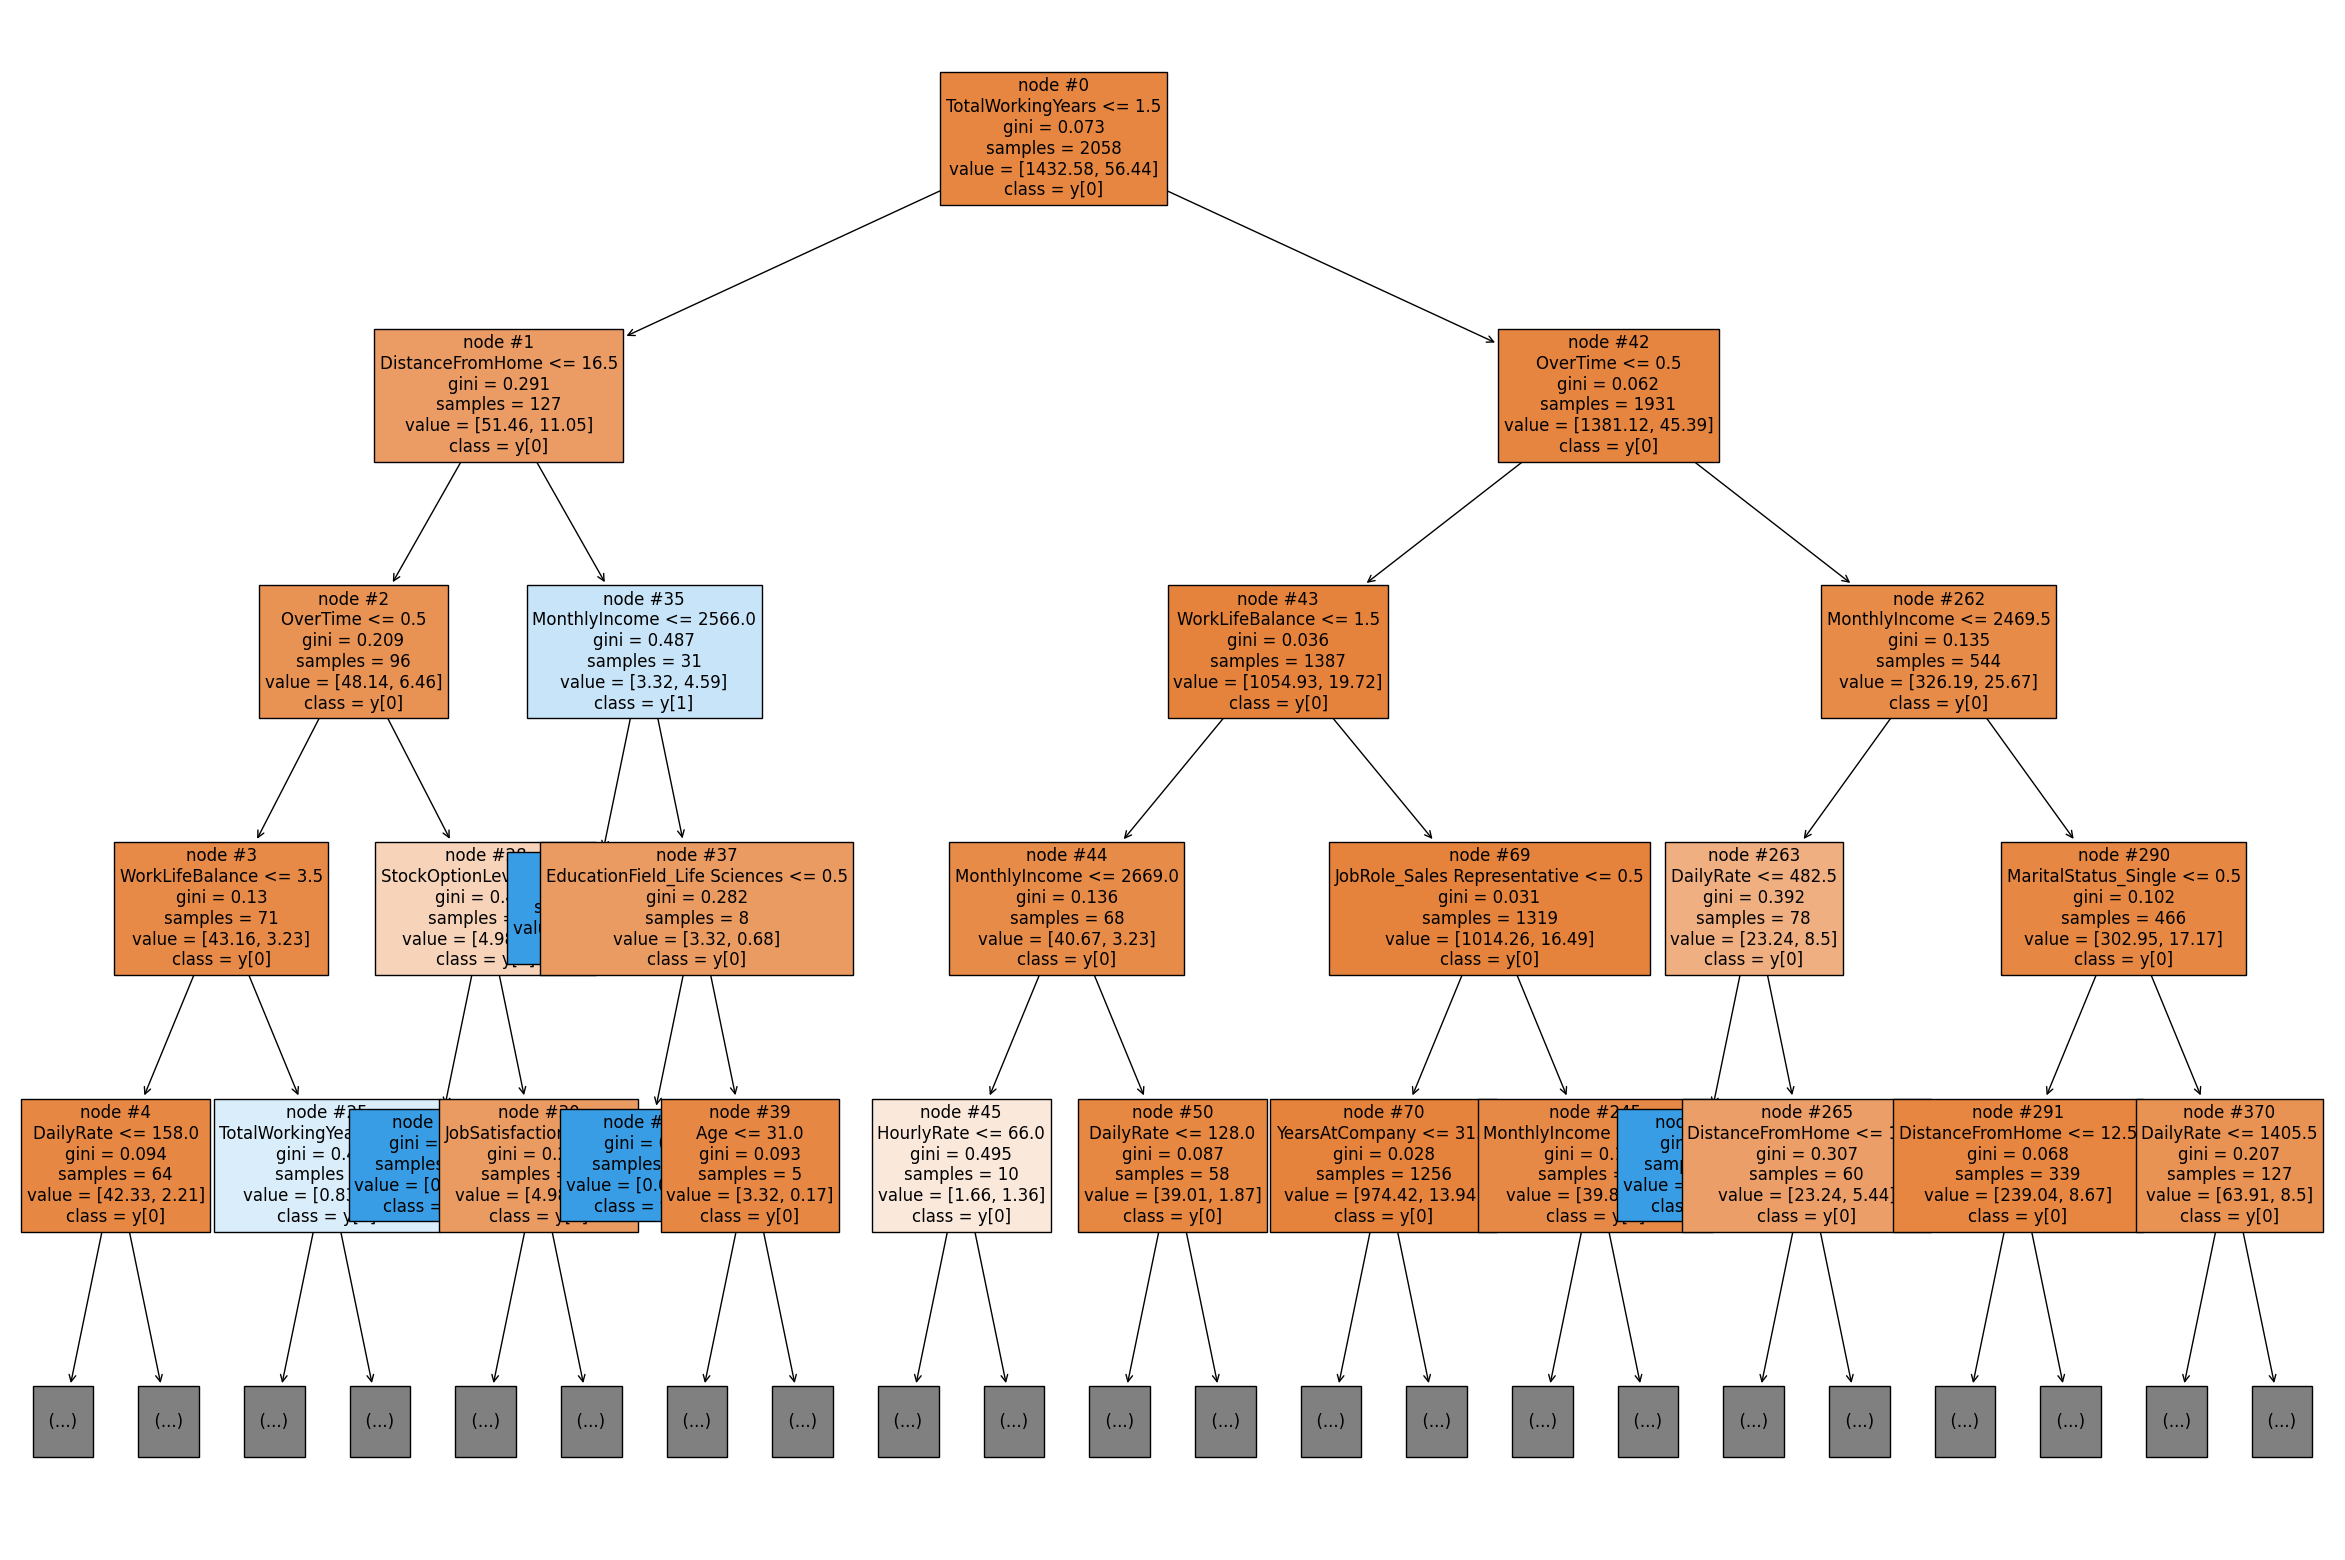

In [127]:
features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt,max_depth=4,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

**Note:** Blue leaves represent the eligible class i.e. **y[1]** and the orange leaves represent the non-eligible class i.e. **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**
- Employees who are working overtime with low salary and low age have a chance of leaving the company, as they might feel overworked and underpaid and might be looking for better opportunities.
- Employees who are working overtime with low salary and are not research scientists have a high chance of attriting.
- Employees, even if they have an income over 3751.5 units but working as sales executives and and living far from home have a high chance of attriting.
- Another segment of people are who are working overtime, with ages younger than 33.5 and not working as junior research scientists, have a greater chance of attrition. This implies that the model suggests except for the junior research scientist role, everyone who is young has a high tendency to attrite.
- Employees who have over 2.5 years of work experience but low work life balance and low percentage hike also tend to attrite, probably as they are seeking a more balanced life.
- Employees who are not working overtime, have low experience and are working as junior research scientists have a small chance of attriting. These employees are comfortable or loyal to the organization.
- Numcompaniesworked also seems to be an important variable in predicting if an employee's likely to attrite.


### **Building the Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [128]:
#Fitting the decision tree classifier on the training datarf_estimator
rf_estimator = RandomForestClassifier(class_weight={0:0.83,1:0.17}, random_state=1)

rf_estimator.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.83, 1: 0.17}, random_state=1)

### **Problem 3: Model Performance of the Randomm Forest Decision Tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



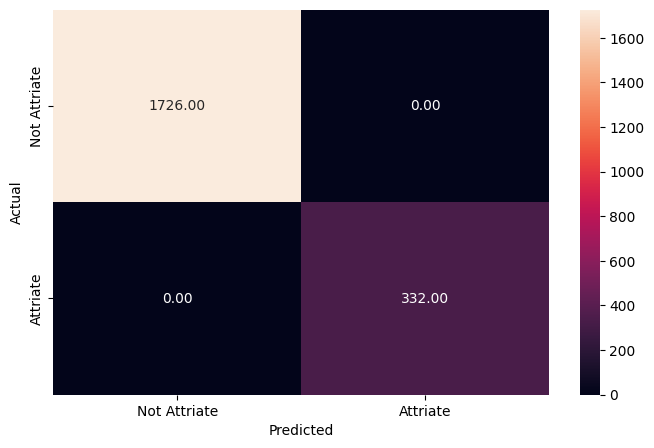

In [129]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

## **3.a. State your observations based on the output showing the performance of the random forest classification tree on the TRAINING set**
- **The Random Forest model achieves a perfect accuracy of 100% on the training set.**
- **The model performs exceptionally well on the training data**

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       740
           1       0.95      0.82      0.88       142

    accuracy                           0.96       882
   macro avg       0.96      0.90      0.93       882
weighted avg       0.96      0.96      0.96       882



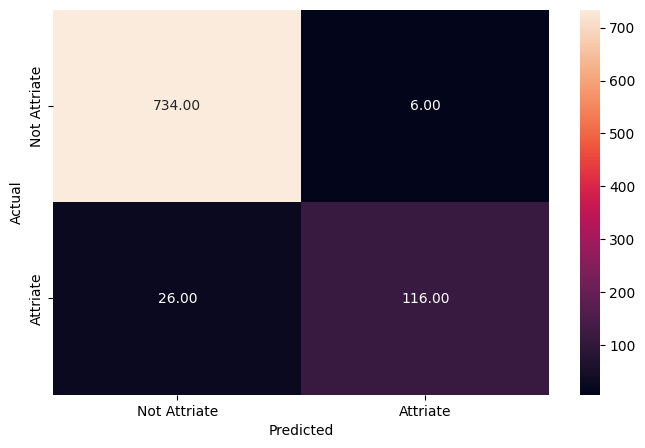

In [130]:
#Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

## **3.b. State your observations based on the output showing the performance of the random forest classification tree on the TEST set**
- **there is a notable difference in performance between the two classes, with class 1 having lower recall compared to class 0. This suggests that the model might struggle more with correctly identifying instances of class 1**
- **----------**

**Let's check the feature importance of the Random Forest:**

<Axes: xlabel='Importance', ylabel='None'>

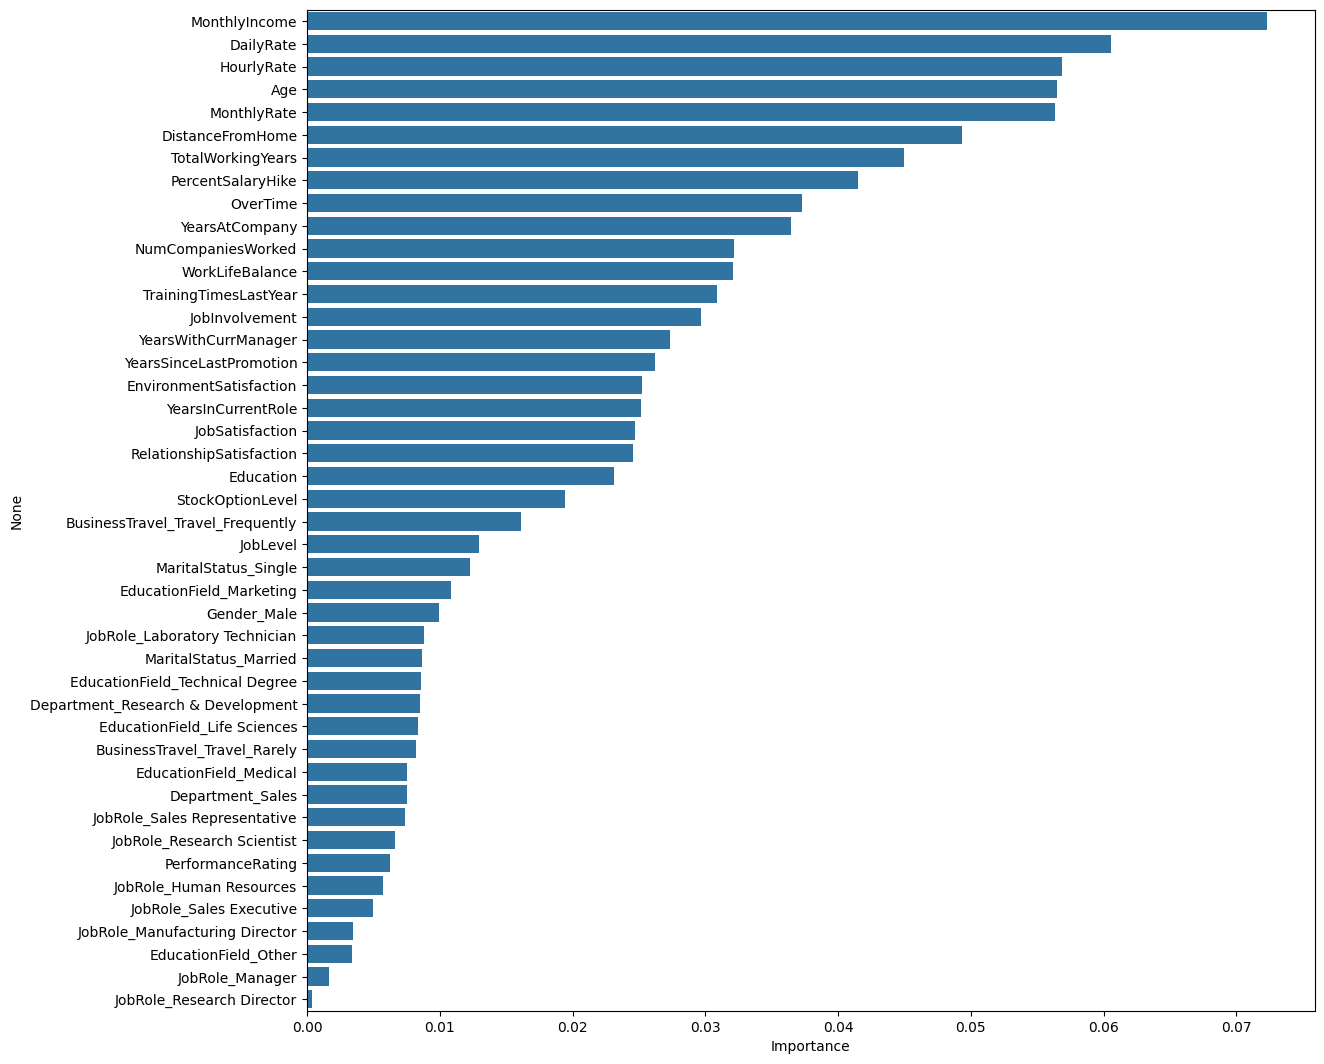

In [131]:
importances = rf_estimator.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

**Observations:**
- The Random Forest further verifies the results from the decision tree - the most important features are Monthy income, age, overtime, total working years and daily rate.
- We can say that the people appear to be leaving the organization because of the overtime they are doing and because they are not paid accordingly. These might be mostly junior-level and mid-level employees with less experience.
- Distance from home is also a key feature, probably as employees living far from the office have to travel a lot, making their schedules hectic.
- Not having stock options is also a driver for attrition - this feature seems to have good importance in both the decision tree and random forest models. This could be related to the junior level employees and their lack of stock options - with the additional burden of a lower salary and working overtime, those without stock options could also be attriting more.
- Other features like number of companies worked and percent salary hike also seem to be intutive in explaining attrition likelihood, as people who have worked in a large number of companies are probably not going to stay loyal to the current organization and may have a high risk of attrition, while if an employee is not getting enough of a salary hike, that might demotivate them and lead to a higher likelihood of attriting as well.
- Other features such as job satisfaction, environment satisfaction and their job level also play a crucial role in knowing whether an employee will attrite or not.

### **Tuning the Random Forest**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [99]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.83,1:0.17}, random_state=1)

# Grid of parameters to choose from
## add from article
params_rf = {
        "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [100]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.83, 1: 0.17}, max_features=0.7,
                       n_estimators=500, random_state=1)

### **Problem 4: Model Performance of the tuned Random Forest decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



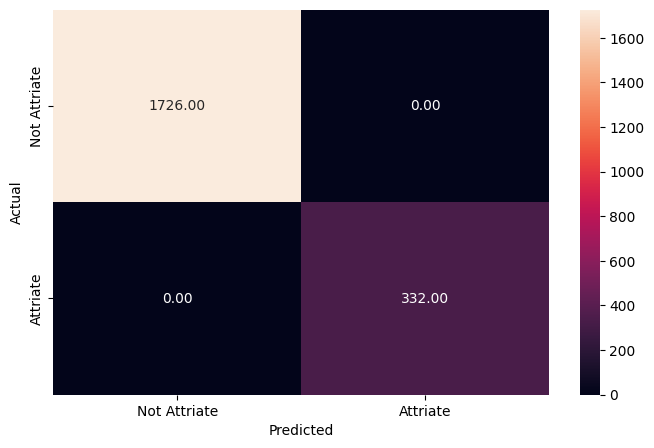

In [132]:
#Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

## **4.a. State your observations based on the output showing the performance of the tuned random forest classification tree on the TRAINING set**
- **perfect everything**
- **----------**

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       740
           1       0.91      0.82      0.86       142

    accuracy                           0.96       882
   macro avg       0.94      0.90      0.92       882
weighted avg       0.96      0.96      0.96       882



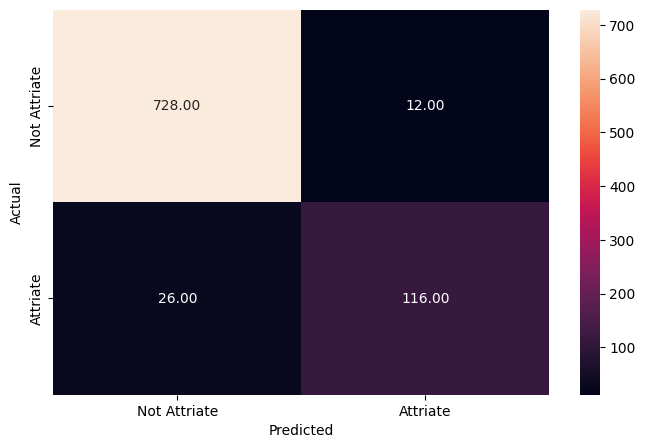

In [133]:
#Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

## **4.b. State your observations based on the output showing the performance of the tuned random forest classification tree on the TEST set**
- **less perfect but still very ideal**
- **----------**

<Axes: xlabel='Importance', ylabel='None'>

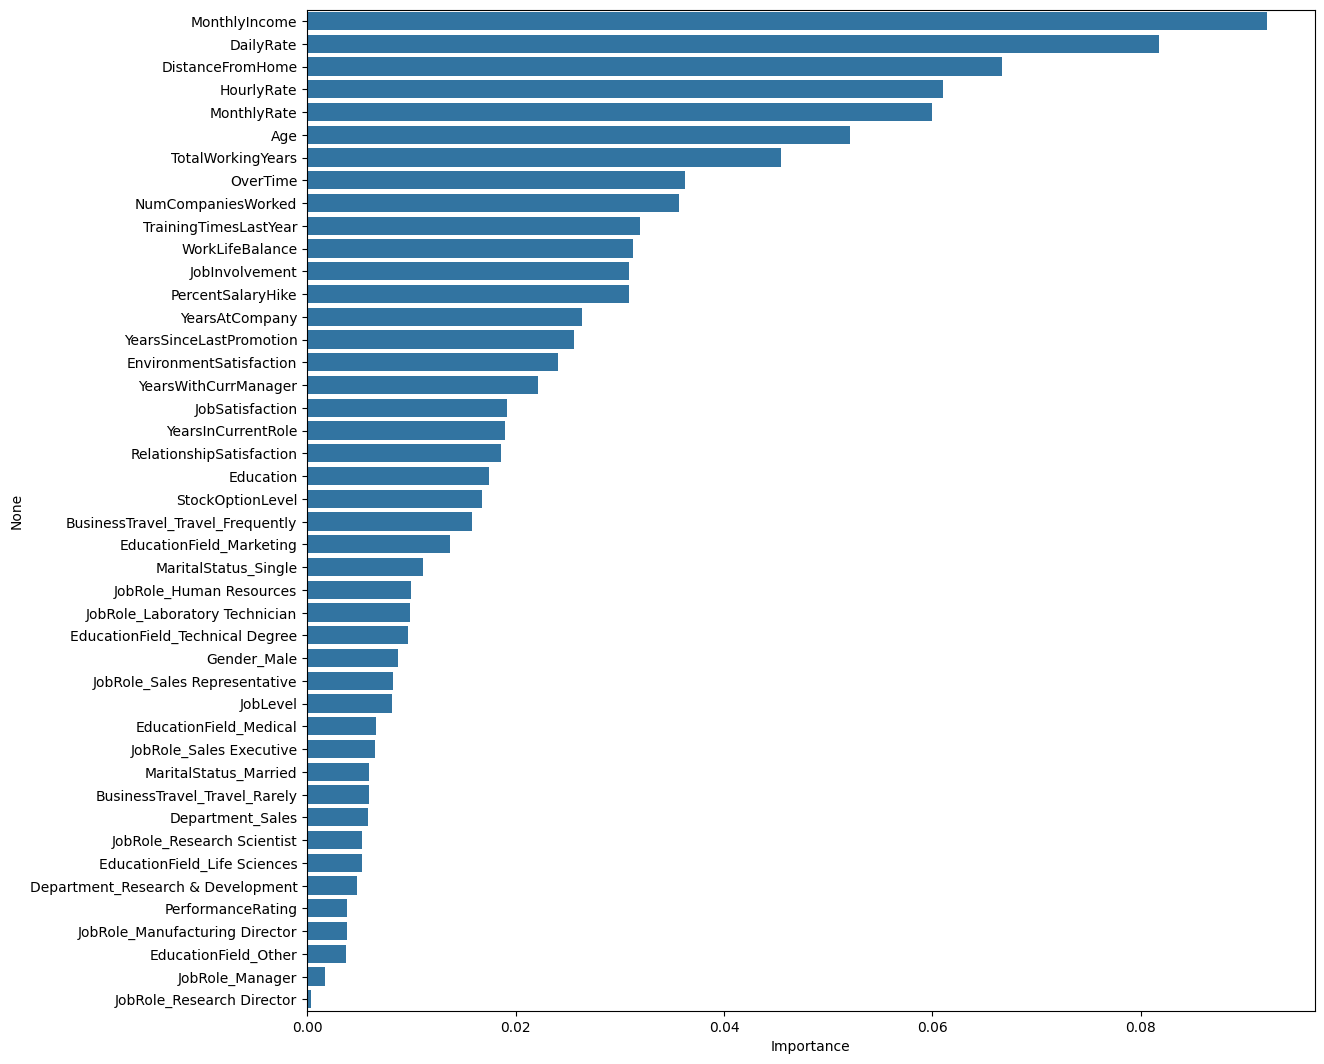

In [134]:
#plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

**Observations:**
- **The feature importance plot for the base model and tuned model are quite similar** - the model seems to suggest that OverTime, MonthlyIncome, Age,TotalWorkingYears and DailyRate are the most important features.
- Other important features are DistanceFromHome, StockOptionLevel, YearsAt Company and NumCompaniesWorked.

### **Problem 5: Model Selection**

**5.a.** Of the four models examined, which one showed the best performance for this business scenario and why?
- **Based on the provided information, it appears that the Random Forest model, particularly the tuned version, exhibited the best performance for predicting employee attrition.The tuned Random Forest model achieved the highest accuracy, precision, recall, and F1-scores on both the training and testing datasets.**

**5.b.** How should the company make use of this model and what actions should they take based on its predictions?
- **The company can leverage the tuned Random Forest model for predicting employee attrition and taking proactive measures to mitigate attrition risk.
After identifying high-risk employees-those individuals who are likely to leave the organization based on the model's predictions, develop and implement retention strategies based on insights gained from the model's analysis of important features.**

**5.c.** Which five feature variables appear to be the most important for predicting attrition?
- **OverTime
MonthlyIncome
Age
TotalWorkingYears
DailyRate**


### **Recommendations**
- We saw that **working overtime is the most important driver of attrition.** The organization should manage their work more efficiently so that employees don't have to work overtime and can manage to have a work-life balance, or failing this, the company could provide some additional incentives to employees who are working overtime in order to retain them.
- **A higher monthly income might lower the odds of an employee attriting.** The company should make sure that all its employees are compensated at least based on industry standards.
- As observed earlier, the organization has a lower percentage salary hike and promotions are given less frequently. The company might be able to focus on **giving promotions more frequently** or they could **increase the annual appraisal hike** to incentivise employees to stay.
- The organization could come up with a **revised CTC plan with stock options for the employees** in order to keep them motivated and invested in the company's performance.
- The organistion should also modify its hiring policy as people who have worked in many companies and have switched a lot should not be hired very often.
- Distance from home is also an important factor for attrition - employees traveling a larger distance to reach the workplace are the ones attriting. For such employees, the company can provide cab facilities so that the commute of employees gets easier.
- The company should also keep track of the hourly rate or the daily rate, so that when the employees need to stay overtime for extra work they are well compansated for that.
- The organization should focus on improving the culture and environment at the workplace by coming up with new ideas to make the envionment more open and friendly.
- Keeping track of the problems which employees with lesser experience face and how the management can help them, will create a healthy envionment for the young employees.
- The organisation should also focus on the employees who are working in sales and marketing, as attrition rate is quite high for these deparments. Perhaps the company could look into their incentive schemes and try to come up with new incentive methods to motivate them to stay.